<a href="https://colab.research.google.com/github/BruDiGe/tutorial-MD/blob/main/MD_tutorial_biocatcode_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Molecular dyamics simulations workshop

First session

Wednesday 4th December 2024 (14:20-15:50)

# Introduction to Molecular Dynamics Simulations with AMBER

-**Author:** Bruno Di Geronimo  
-**Contact:** bgeronimo3@gatech.edu  
-**Github:** https://github.com/BruDiGe/tutorial-MD.git  

## Useful links:
1 [AMBER](https://ambermd.org/index.php)


2 [H++](http://newbiophysics.cs.vt.edu/H++/hppdetails.php)


3 [pdb4amber](https://ambermd.org/tutorials/basic/tutorial9/index.php)


4 [LEaP](https://ambermd.org/tutorials/pengfei/)

5 [PyMOL](https://pymolwiki.org/index.php/Main_Page)

6 [Advance AMBER tutorial](https://ambermd.org/tutorials/advanced/tutorial41/index.php#3.%20tICA%20Analysis%20and%20MSM%20Construction)


## Index of Actions:

### 1. Instal AmberTools & ParmEd using CONDA

First, we will install all the necessary software for this tutorial.

Estimated time: ~5 minutes.

---

### 2. Create Your PDB Files
We will use PyMOL to build our COSTB2 models. This involves:

Extracting Chain A from PDB ID 6GGI.
Extracting the substrate (geranylgeranyl phosphate, abbreviated as GGS) from PDB ID 5GUE.

<div style="border: 2px solid #FFCC00; padding: 10px; background-color: #FFF8DC; border-radius: 5px;">
<b>Important Note:</b>  
The extracted <b>GGS</b> is in its <i>thio state</i> and lacks hydrogens.  
Use the <b>Builder</b> tool in PyMOL (or another software) to modify the substrate and ensure it is complete.
</div>


### Protein Protonation State

Use the [H++](http://newbiophysics.cs.vt.edu/H++/hppdetails.php) webserver to determine the protonation state of **6GGI_Chain-A**. Only include amino acids (aa) in the process.

At the end, we should have the following structures:

- **6GGI-A_H.pdb**: The protein.
- **GSSH-A.pdb**: The substrate.
- **WAT-A.pdb**: The water molecules (note: crystallographic waters are important).
- **MG-A.pdb**: The magnesium ion.

We will prepare two systems:
- **Apo system**: (**6GGI-A**) without the substrate.
- **Holo system**: (**6GGI-A-GSS**) with the substrate.

---

### 3. Tleap

Using **tleap**, we can build the corresponding topology and initial coordinates using the provided PDBs and force fields (**ff19SB** for the protein and **TIP3P** for water molecules).

---

### 4. Analysis with ParmEd

Use **ParmEd** to visualize and understand the topology file and its contents.

---

### 5. Conventional MD

In this course, we will not run conventional molecular dynamics (cMD) simulations due to limited resources and time. However, you can review the proposed scheme and input files provided at this [GitHub link](https://github.com/BruDiGe/tutorial-MD/tree/main/04_cmd).

---

### 6. Visualization of Molecular Dynamics Simulations

Download the following files from [this link](https://github.com/BruDiGe/tutorial-MD/tree/main/04_cmd):

#### **1. APO System**
- `6GGI-A_equi.pdb`
- `6GGI-A-md_500ns.dcd`

#### **2. HOLO System**
- `6GGI-A-GSS_equi.pdb`
- `6GGI-A-GSS-md_500ns.dcd`

**Steps to visualize the trajectories in PyMOL:**

Open PyMol and change working directory where you have download all structures (File > Working Directory > Change ...)

In the PyMol console type:

- For **APO**:
     ```
     load 6GGI-A_equi.pdb, apo
     load_traj 6GGI-A-md_500ns.dcd, apo
     ```

- For **HOLO**:
     ```
     load 6GGI-A-GSS_equi.pdb, holo
     load_traj 6GGI-A-GSS-md_500ns.dcd, holo
     ```

---

### 7. Trajectory Analysis with CPPTRAJ

Using the **cpptraj** software, we will analyze both trajectories and calculate:
- Root Mean Square Deviation (RMSD).
- Root Mean Square Fluctuation (RMSF).
- Linear Interaction Energy (LIE) values.

---

### 8. Discussion and Conclusions

(If there are any at all! 😋)

---

# 1. Instal Ambertools & parmed using CONDA

The `pip` command is the Python package installer. It is used to install, manage, and update Python packages from the Python Package Index (**PyPI**) and other repositories.

In [1]:
!pip install -q condacolab

In [2]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...


The `conda` command is a versatile tool for managing packages, dependencies, and environments in Python (and other languages). It is part of the Conda package management system, commonly associated with the **Anaconda** and **Miniconda** distributions.

In [2]:
!conda --version

conda 23.11.0


In [3]:
!conda create --name AmberTools23

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/AmberTools23



Preparing transaction: / done
Verifying transaction: \ | done
Executing transaction: - done
#
# To activate this environment, use
#
#     $ conda activate AmberTools23
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [4]:
!source activate base

In [5]:
!conda install -c conda-forge ambertools=23

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ambertools=23


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ambertools-23.6            |cuda_None_nompi_py310ha112c55_105        89.4 MB  conda-forge
    arpack-3.9.1               |nompi_h77f6705_101         127 KB  conda-forge
    blosc-1.21.6               |       hef167b5_0          48 KB  conda-forge
    brotli-1.1.0               |       hd590300_1          19 KB  conda-forge
    brotli-bin-1.1.0           |       hd590300_1          19 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 K

In [6]:
!source activate AmberTools23

The `which` command is used to locate the executable file associated with a given command. It displays the full path of the executable.

In [7]:
!which cpptraj

/usr/local/bin/cpptraj


In [ ]:
!which tleap

In [ ]:
!pip install parmed

In [ ]:
!which parmed

# 2. Create your PDBs

Follow your instructor's guidelines to obtain the corresponding PDB files:

- **6GGI-A_H.pdb**: Protein
- **GSSH-A.pdb**: Substrate
- **WAT-A.pdb**: Water molecules (note: crystallographic waters are important)
- **MG-A.pdb**: Magnesium ion

Alternatively, the files can also be downloaded here: [link](https://github.com/BruDiGe/tutorial-MD/tree/main/00_structures)


# 3. tleap

*Tleap* works by transforming our PDB files into the corresponding topology file, which contains all the information related to:
- Atom types
- Residues
- Bonds
- Angles
- Dihedrals

Additionally, it generates the initial coordinates (x, y, z coordinates only) for the system.

---

![AMBER Diagram](https://ambermd.org/tutorials/basic/tutorial9/include/amber_flow.png)



> **NOTE:**  
> We are not going to create any topology or coordinate files. This is because we do not have access to the corresponding force field, as we have only installed **AMBER TOOLS** and not the full **AMBER** suite.  
>  
> Our topology and coordinate files can be found [here](https://github.com/BruDiGe/tutorial-MD/tree/main/02_parm).


Here, we are just going to take a look at a *tleap* input, the information we need to provide, and how it works!  

The `curl` command is a powerful tool used to transfer data from or to a server using various protocols, such as HTTP, HTTPS, FTP, and more.


Download the files using `curl` and visualize them with `cat`.


In [ ]:
!pip install colab-ssh

In [ ]:
!which vim

The `ls` command in Linux/Unix is used to list the contents of a directory. It is one of the most commonly used commands to inspect files and directories in a filesystem.

The command `ls -lrth` lists files and directories:
- Sorted by **time** (most recent last).
- Displaying **size** in a human-readable format.

In [ ]:
!ls

In [ ]:
!curl -o tleap-holo.in https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/01_tleap/tleap-holo.in


In [ ]:
!ls

In [ ]:
!cat tleap-holo.in

In [ ]:
!curl -o tleap-apo.in https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/01_tleap/tleap-apo.in

In [ ]:
!cat tleap-apo.in

## But, how do we get GSS' parameters?

Using **antechamber**, we have utilized the **GAFF2** (General Amber Force Field 2) to obtain the corresponding parameters. To optimize the molecule, we used [**obabel**](https://open-babel.readthedocs.io/en/latest/Command-line_tools/babel.html) to minimize bond lengths.

---

#### PARAMETERS FOR LIGAND GSS-A (Residue name GSA) ####

> **NOTE:**  
> Use the following commands to generate the ligand parameters:  
>
> ```bash
> antechamber -fi pdb -i GSSH-A-min.pdb -fo prepi -o GSSH-A.prepi -c bcc -nc -3 -rn GSA -at gaff2
>
> parmchk2 -i GSSH-A.prepi -o GSSH-A.frcmod -f prepi
> ```

In [ ]:
!curl -o GSSH-A.prepi https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/01_tleap/GSSH-A/GSSH-A.prepi
!ls -lrth
!cat GSSH-A.prepi

In [ ]:
!curl -o GSSH-A.frcmod https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/01_tleap/GSSH-A/GSSH-A.frcmod
!ls -lrth
!cat GSSH-A.frcmod

# 4. Analysis with Parmed

[ParmEd](https://parmed.github.io/ParmEd/html/index.html) is a general tool for aiding investigations of biomolecular systems using popular molecular simulation packages, such as **Amber**, **CHARMM**, and **OpenMM**, and is written in Python.

This software allows us to extract all related information from topology files and modify them if needed.




In [ ]:
!which parmed
!curl -o 6GGI-A-GSS.prmtop https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/02_parm/6GGI-A-GSS.prmtop
!ls -lrth
# Commands to run with parmed
# help
# summary
# printDetails :GSA
# printBonds :275
!parmed 6GGI-A-GSS.prmtop

# 5. Conventional MD

In this tutorial, we are not going to run any MD simulations at all (for obvious reasons). Instead, the results are uploaded [here](https://github.com/BruDiGe/tutorial-MD/tree/main/04_cmd).

---

> **NOTE:**  
> In my humble opinion, this is one of the best tutorials about MD simulations with **AMBER** I have ever seen.  
> You can find the guide [here](https://github.com/BruDiGe/tutorial-MD/blob/main/04_cmd/AMBERguide.pdf).

---

![MD Steps](https://raw.githubusercontent.com/BruDiGe/tutorial-MD/main/04_cmd/md-steps.png)


---


## Minimization
Minimization removes any steric clashes or high-energy configurations in the system that result from initial structural preparation.

* Files:
  * min1.in
  * min2.in
  * min3.in

## Heating
Gradually increase the system's temperature (from 100 to 300K)to the desired target, ensuring that atoms adapt naturally to higher thermal energies.In this case is performed under an NVT ensemble (constant number of particles, volume, and temperature).

* Files:
  * h.in

## Equilibration
Stabilize the system's pressure, temperature, and density to ensure it is ready for reliable production runs! Conducted in multiple steps, often transitioning from an NVT ensemble to an NPT ensemble (constant number of particles, pressure, and temperature). Restraints (not constraints) are often relaxed progressively.

* Files:
  * eq1.in
  * eq2.in
  * eq3.in
  * eq4.in
  * eq5.in
  * eq6.in

## Production
Perform the actual simulation to observe the system's dynamics over a biologically or chemically relevant timescale. Run the simulation for a long time (e.g., 500 ns or more) under the desired ensemble, typically NPT (and this is our case) with a time step of 2fs (dt = 0.002). In total 500 snapshots are saved, every 1 ns or 1000ps.

* Files:
  * md.in

# 6. Visualization of the Molecular Dynamic simulations

### Visualizing MD Simulation Trajectories Using PyMOL

Here, we are going to visualize the MD simulation trajectories using **PyMOL**. Download the files from [here](https://github.com/BruDiGe/tutorial-MD/tree/main/04_cmd) to your working directory (on your laptop or local machine).  

Open a **PyMOL** window in your current directory and use the command line to load the **apo** and **holo** trajectories.

---

> **NOTE:**  
> All the trajectories provided here are saved without water and counterion molecules for clarity.  
> Open a **PyMOL** window and set the working directory:  
> **File > Working Directory > Change...**  
> Select the directory where you saved the corresponding files.

---

#### **Commands to Load Trajectories**
1. Load the **APO** and **HOLO** system:
   ```bash
   load 6GGI-A_equi.pdb, apo
   load_traj 6GGI-A-md_500ns.dcd, apo
   load 6GGI-A-GSS_equi.pdb, holo
   load_traj 6GGI-A-GSS-md_500ns.dcd, holo
   ```







# 7. Trajectory analysis with CPPTRAJ software
#### Download Trajectories and Topology Files Without Waters

Since we have to analyze large files, we are going to download the entire GitHub project here using `git` command and then navigate till the directory:


In [8]:
!git version
!git clone https://github.com/BruDiGe/tutorial-MD.git

git version 2.34.1
Cloning into 'tutorial-MD'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 262 (delta 65), reused 94 (delta 37), pack-reused 120 (from 1)
Receiving objects: 100% (262/262), 87.96 MiB | 30.22 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Filtering content: 100% (4/4), 397.74 MiB | 53.00 MiB/s, done.
Encountered 12 file(s) that should have been pointers, but weren't:
	00_structures/6GGI-A_H.pdb
	00_structures/GSSH-A.pdb
	00_structures/MG-A.pdb
	00_structures/WAT-A.pdb
	01_tleap/GSSH-A/GSSH-A-min.pdb
	01_tleap/GSSH-A/sqm.pdb
	02_parm/6GGI-A-GSS-solv_leap.pdb
	02_parm/6GGI-A-solv_leap.pdb
	03_metadynamics/6GGI-A-GSS_equi.pdb
	03_metadynamics/6GGI-A-GSS_metad-01.pdb
	03_metadynamics/GSA.pdb
	04_cmd/6GGI-A_equi.pdb


In [9]:
!ls -lrth

total 32K
drwxr-xr-x 1 root root 4.0K Nov 25 19:13 sample_data
-rw-r--r-- 1 root root  23K Dec  1 23:51 condacolab_install.log
drwxr-xr-x 8 root root 4.0K Dec  1 23:56 tutorial-MD


In [10]:
cd tutorial-MD

/content/tutorial-MD


In [11]:
ls -lrt

total 576
drwxr-xr-x 2 root root   4096 Dec  1 23:56 00_structures/
drwxr-xr-x 3 root root   4096 Dec  1 23:56 01_tleap/
drwxr-xr-x 2 root root   4096 Dec  1 23:56 02_parm/
-rw-r--r-- 1 root root 176810 Dec  1 23:56 MD_tutorial_biocatcode_1.ipynb
-rw-r--r-- 1 root root    478 Dec  1 23:56 README.md
-rw-r--r-- 1 root root 385000 Dec  1 23:56 MD_tutorial_biocatcode_2.ipynb
drwxr-xr-x 3 root root   4096 Dec  1 23:56 04_cmd/
drwxr-xr-x 2 root root   4096 Dec  1 23:56 03_metadynamics/


In [12]:
cd 04_cmd

/content/tutorial-MD/04_cmd


In [14]:
### make sure you see all prmtop and dcd files
!ls -lrth

total 63M
-rw-r--r-- 1 root root 2.1M Dec  1 23:56 6GGI-A-GSS_clear.prmtop
-rw-r--r-- 1 root root 2.0M Dec  1 23:56 6GGI-A_clear.prmtop
-rw-r--r-- 1 root root 375K Dec  1 23:56 6GGI-A_equi.pdb
-rw-r--r-- 1 root root    1 Dec  1 23:56 README
-rw-r--r-- 1 root root 3.4M Dec  1 23:56 AMBERguide.pdf
drwxr-xr-x 2 root root 4.0K Dec  1 23:56 inputs-md
-rw-r--r-- 1 root root 131K Dec  1 23:56 md-steps.png
-rw-r--r-- 1 root root 380K Dec  1 23:56 6GGI-A-GSS_equi.pdb
-rw-r--r-- 1 root root  28M Dec  1 23:56 6GGI-A-GSS-md_500ns.dcd
-rw-r--r-- 1 root root  28M Dec  1 23:56 6GGI-A-md_500ns.dcd


### Calculate RMSD, RMSF and LIE component (apo vs holo)

#### RMSD
**RMSD** stands for Root Mean Square Deviation, a widely used metric in structural biology, chemistry, and molecular dynamics to quantify the difference between two sets of atomic positions. It provides a measure of how much a structure deviates from a reference structure over time or between two structures.

Mathematical Definition:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6fd2eda50eaf8df1982edf3751a6aa6cc102fff1" alt="RMSD Figure" width="500">

---

#### RMSF

**RMSF** stands for Root Mean Square Fluctuation, a metric used in molecular dynamics (MD) simulations to quantify the flexibility or mobility of individual atoms (or residues) in a molecule over time. Unlike RMSD, which measures the overall deviation of a structure, RMSF focuses on the variability of specific parts (e.g., residues) of the system during the simulation.  

---


#### Binding Free Energy Formula (LIE)

The Linear Interaction Energy (**LIE**) method in cpptraj, part of the AmberTools suite, estimates the free energy of binding for a ligand to its receptor. This method is a computationally efficient approach for binding affinity prediction, using data from molecular dynamics (MD) simulations.  


The **Linear Interaction Energy (LIE)** method estimates the binding free energy (\(\Delta G_{bind}\)) using the formula:

$$\Delta G_{bind} = \alpha \langle V_{vdW}^{bound} \rangle + \beta \langle V_{Coul}^{bound} \rangle - \gamma$$

Where:
- $\langle V_{vdW}^{bound} \rangle$: Average van der Waals interaction energy.
- $\langle V_{Coul}^{bound} \rangle$: Average Coulombic interaction energy.
- $\alpha$, $\beta$, $\gamma$: Empirical coefficients. We use standard ones here.

---


In [ ]:
# check if cpptraj is installed (it should be done at first point)
!which cpptraj

In [16]:
#run cpptraj & next commands !NOTE:  Copy & paste the commands one by one and use enter to run each line
"""
parm 6GGI-A_clear.prmtop
trajin 6GGI-A-md_500ns.dcd
rmsd apo-backbone :1-294@CA,C,N,O out 6GGI-A_backbone.rmsd
atomicfluct :1-294@CA,C,N,O out 6GGI-A_backbone.agr byres
rmsd n-terminal-loop :279-294@CA,C,N,O out 6GGI-A_loop.rmsd
go
quit
"""
!cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/01/24 23:59:33
| Available memory: 1.669 GB

	Loading previous history from log 'cpptraj.log'
> parm 6GGI-A_clear.prmtop
  [parm 6GGI-A_clear.prmtop]
	Reading '6GGI-A_clear.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
> trajin 6GGI-A-md_500ns.dcd
  [trajin 6GGI-A-md_500ns.dcd]
	Reading '6GGI-A-md_500ns.dcd' as Charmm DCD
	Version < 22; assuming X-aligned cell.
> rmsd apo-backbone :1-294@CA,C,N,O out 6GGI-A_backbone.rmsd
  [rmsd apo-backbone :1-294@CA,C,N,O out 6GGI-A_backbone.rmsd]
    RMSD: (:1-294@CA,C,N,O), reference is first frame (:1-294@CA,C,N,O).
	Best-fit RMSD will be calculated, coords will be rotated and translated.
> atomicfluct :1-294@CA,C,N,O out 6GGI-A_backbone.agr byres
  [atomicfluct :1-294@CA,C,N,O out 6GGI-A_backbone.agr byres]
    ATOMICFLUCT: calculating atomic positional fluctuations over residues.
	Output

In [18]:
#Checked that we got cpptraj results!
!ls -lrth
!head 6GGI-A_backbone.rmsd
!tail 6GGI-A_backbone.rmsd

total 63M
-rw-r--r-- 1 root root 2.1M Dec  1 23:56 6GGI-A-GSS_clear.prmtop
-rw-r--r-- 1 root root 2.0M Dec  1 23:56 6GGI-A_clear.prmtop
-rw-r--r-- 1 root root 375K Dec  1 23:56 6GGI-A_equi.pdb
-rw-r--r-- 1 root root    1 Dec  1 23:56 README
-rw-r--r-- 1 root root 3.4M Dec  1 23:56 AMBERguide.pdf
drwxr-xr-x 2 root root 4.0K Dec  1 23:56 inputs-md
-rw-r--r-- 1 root root 131K Dec  1 23:56 md-steps.png
-rw-r--r-- 1 root root 380K Dec  1 23:56 6GGI-A-GSS_equi.pdb
-rw-r--r-- 1 root root  28M Dec  1 23:56 6GGI-A-GSS-md_500ns.dcd
-rw-r--r-- 1 root root  28M Dec  1 23:56 6GGI-A-md_500ns.dcd
-rw-r--r-- 1 root root  11K Dec  2 00:05 6GGI-A_backbone.rmsd
-rw-r--r-- 1 root root 6.5K Dec  2 00:05 6GGI-A_backbone.agr
-rw-r--r-- 1 root root  13K Dec  2 00:05 6GGI-A_loop.rmsd
-rw-r--r-- 1 root root  302 Dec  2 00:05 cpptraj.log
#Frame   apo-backbone
       1       0.0000
       2       0.9899
       3       1.1327
       4       1.2183
       5       1.3168
       6       1.2098
       7       1.1822
 

In [21]:
# Same for the Holo syste, we run cpptraj & next commands:
"""
parm 6GGI-A-GSS_clear.prmtop
trajin 6GGI-A-GSS-md_500ns.dcd
rmsd apo-backbone :1-294@CA,C,N,O out 6GGI-A-GSS_backbone.rmsd
atomicfluct :1-294@CA,C,N,O out 6GGI-A-GSS_backbone.agr byres
rmsd :1-294 first perrescenter perres range 295 perresout GSA.rmsd perresmask :295&!(@H=)
rmsd n-terminal-loop :279-294@CA,C,N,O out 6GGI-A-GSA_loop.rmsd
lie GSA :1-294 :295 out lie-GSA.dat
go
quit
"""
!cpptraj


CPPTRAJ: Trajectory Analysis. V6.18.1 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 12/02/24 00:09:35
| Available memory: 4.436 GB

	Loading previous history from log 'cpptraj.log'
> parm 6GGI-A-GSS_clear.prmtop
  [parm 6GGI-A-GSS_clear.prmtop]
	Reading '6GGI-A-GSS_clear.prmtop' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
> trajin 6GGI-A-GSS-md_500ns.dcd
  [trajin 6GGI-A-GSS-md_500ns.dcd]
	Reading '6GGI-A-GSS-md_500ns.dcd' as Charmm DCD
	Version < 22; assuming X-aligned cell.
> rmsd :1-294 first perrescenter perres range 295 perresout GSA.rmsd perresmask :295&!(@H=)
  [rmsd :1-294 first perrescenter perres range 295 perresout GSA.rmsd perresmask :295&!(@H=)]
    RMSD: (:1-294), reference is first frame (:1-294).
	Best-fit RMSD will be calculated, coords will be rotated and translated.
          No-fit RMSD will also be calculated for residues 295 using mask [:X&:295&!(@H=)].
          Per-residue output file is GSA.rms

In [30]:
!ls -lrth
!head GSA.rmsd
!head lie-GSA.dat
!head 6GGI-A-GSA_loop.rmsd

total 64M
-rw-r--r-- 1 root root 2.1M Dec  1 23:56 6GGI-A-GSS_clear.prmtop
-rw-r--r-- 1 root root 2.0M Dec  1 23:56 6GGI-A_clear.prmtop
-rw-r--r-- 1 root root 375K Dec  1 23:56 6GGI-A_equi.pdb
-rw-r--r-- 1 root root    1 Dec  1 23:56 README
-rw-r--r-- 1 root root 3.4M Dec  1 23:56 AMBERguide.pdf
drwxr-xr-x 2 root root 4.0K Dec  1 23:56 inputs-md
-rw-r--r-- 1 root root 131K Dec  1 23:56 md-steps.png
-rw-r--r-- 1 root root 380K Dec  1 23:56 6GGI-A-GSS_equi.pdb
-rw-r--r-- 1 root root  28M Dec  1 23:56 6GGI-A-GSS-md_500ns.dcd
-rw-r--r-- 1 root root  28M Dec  1 23:56 6GGI-A-md_500ns.dcd
-rw-r--r-- 1 root root  11K Dec  2 00:05 6GGI-A_backbone.rmsd
-rw-r--r-- 1 root root 6.5K Dec  2 00:05 6GGI-A_backbone.agr
-rw-r--r-- 1 root root  13K Dec  2 00:05 6GGI-A_loop.rmsd
-rw-r--r-- 1 root root  11K Dec  2 00:08 6GGI-A-GSS_backbone.rmsd
-rw-r--r-- 1 root root 6.5K Dec  2 00:08 6GGI-A-GSS_backbone.agr
-rw-r--r-- 1 root root  13K Dec  2 00:08 6GGI-A-GSA_loop.rmsd
-rw-r--r-- 1 root root  18K Dec  2 00

#### Plot Calculated RMSD, RMSF, and LIE Components (APO vs HOLO)

Use **matplotlib** scripts to plot the corresponding results for:
- **RMSD**
- **RMSF**
- **LIE Components**

These plots will compare the **APO** and **HOLO** systems.

### PLOT RMSD

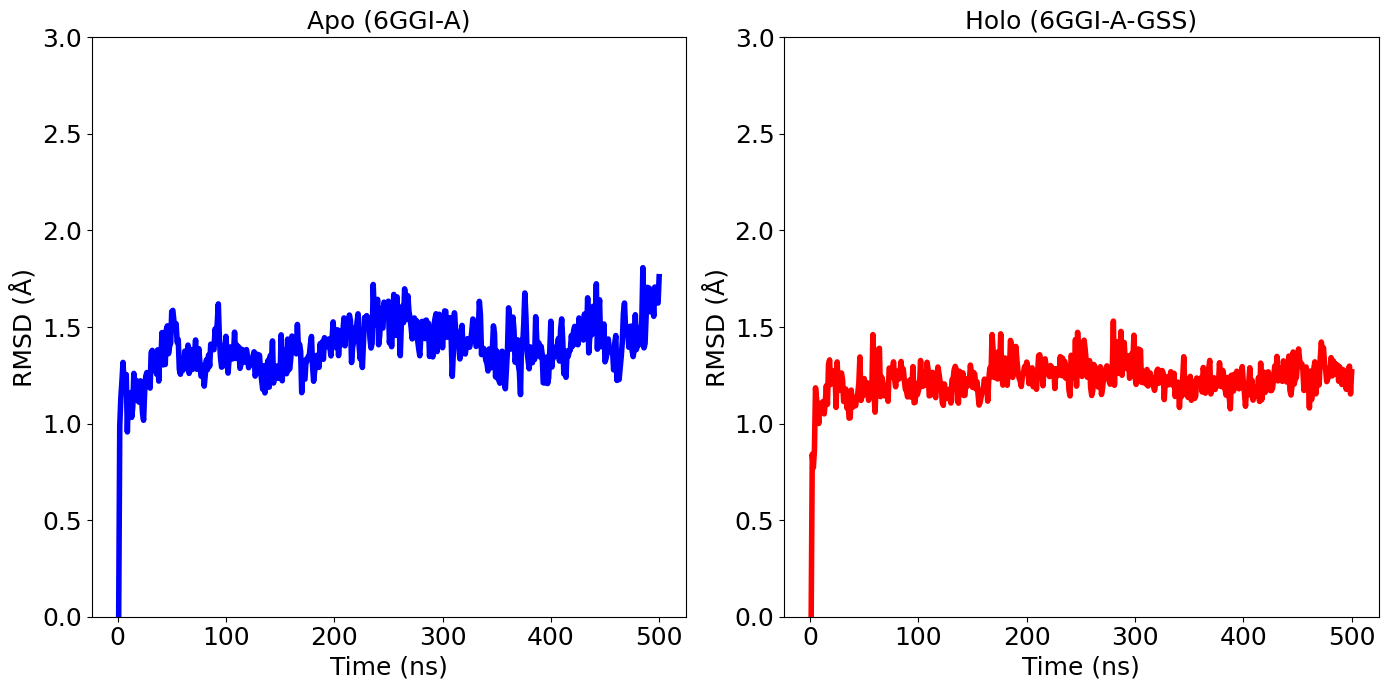

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Load the RMSD data from the uploaded files
file_apo = '6GGI-A_backbone.rmsd'
file_holo = '6GGI-A-GSS_backbone.rmsd'

# Load the data
data_apo = np.loadtxt(file_apo, skiprows=1)  # Adjust skiprows as needed
data_holo = np.loadtxt(file_holo, skiprows=1)

# Extract time and RMSD values
time_apo = data_apo[:, 0]  # Assuming time is in the first column
rmsd_apo = data_apo[:, 1]  # Assuming RMSD is in the second column

time_holo = data_holo[:, 0]
rmsd_holo = data_holo[:, 1]

# Font size customization
font_size_ticks = 18
font_size_labels = 18

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plot Apo (6GGI-A) on the left
axs[0].plot(time_apo, rmsd_apo, color='blue', linewidth=4)
axs[0].set_title('Apo (6GGI-A)', fontsize=font_size_labels)
axs[0].set_xlabel('Time (ns)', fontsize=font_size_labels)
axs[0].set_ylabel('RMSD (Å)', fontsize=font_size_labels)
axs[0].tick_params(axis='both', which='major', labelsize=font_size_ticks)
axs[0].set_ylim(0, 3)


# Plot Holo (6GGI-A-GSS) on the right
axs[1].plot(time_holo, rmsd_holo, color='red', linewidth=4)
axs[1].set_title('Holo (6GGI-A-GSS)', fontsize=font_size_labels)
axs[1].set_xlabel('Time (ns)', fontsize=font_size_labels)
axs[1].set_ylabel('RMSD (Å)', fontsize=font_size_labels)
axs[1].tick_params(axis='both', which='major', labelsize=font_size_ticks)
axs[1].set_ylim(0, 3)



# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()




### PLOT RMSF

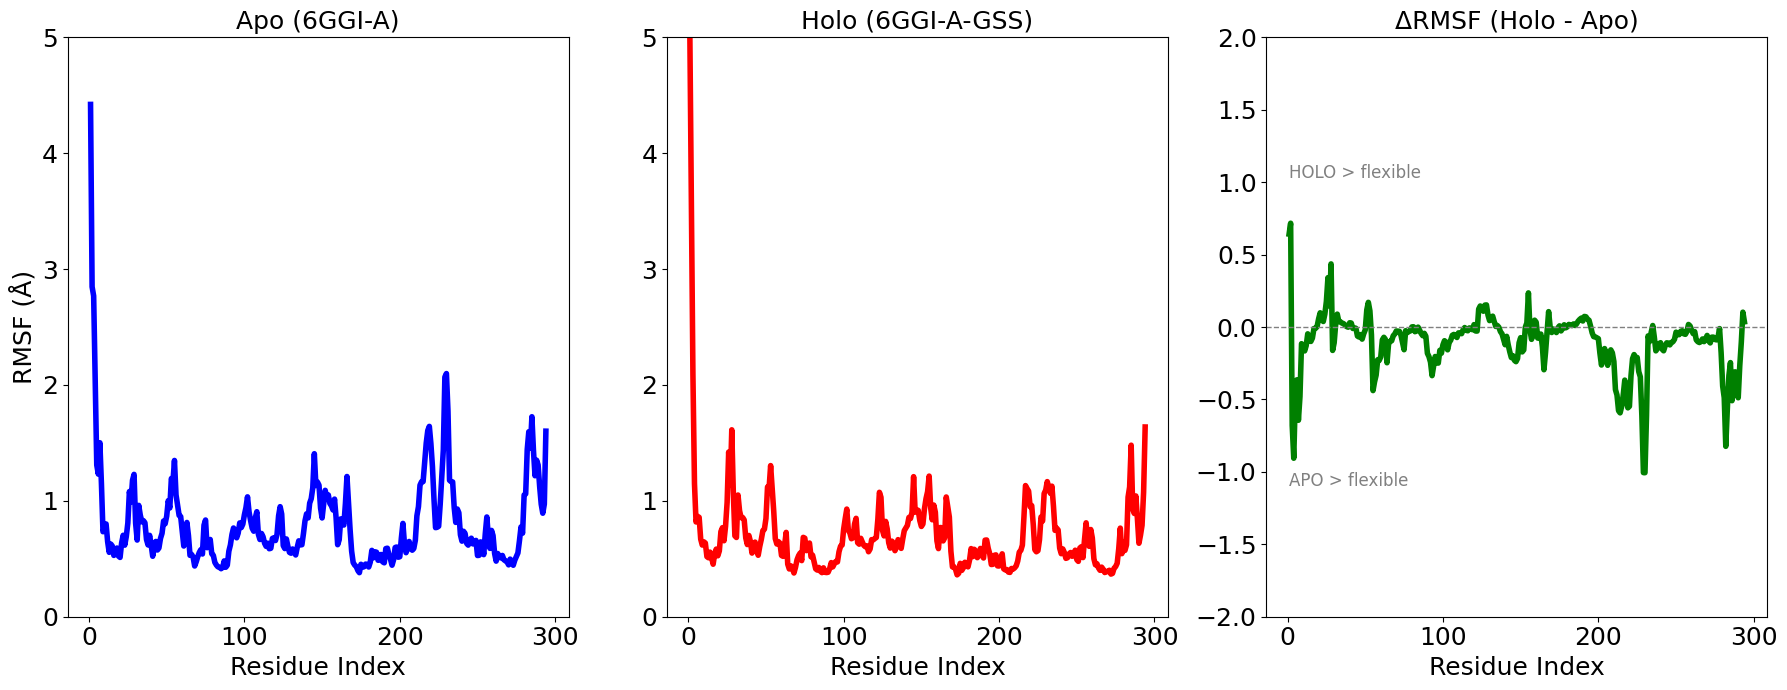

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# File paths for RMSF data
file_apo_rmsf = '6GGI-A_backbone.agr'
file_holo_rmsf = '6GGI-A-GSS_backbone.agr'

# Load the RMSF data from the files, assuming the first column is residue indices and the second column is RMSF values
data_apo = np.loadtxt(file_apo_rmsf, skiprows=8)  # Adjust skiprows if there's a header
data_holo = np.loadtxt(file_holo_rmsf, skiprows=8)

# Extract residue indices and RMSF values
residues_apo = data_apo[:, 0]
rmsf_apo = data_apo[:, 1]

residues_holo = data_holo[:, 0]
rmsf_holo = data_holo[:, 1]

# Calculate the difference (ΔRMSF)
delta_rmsf = rmsf_holo - rmsf_apo

# Font size customization
font_size_ticks = 18
font_size_labels = 18

# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 7))

# Plot Apo RMSF on the left
axs[0].plot(residues_apo, rmsf_apo, color='blue', linewidth=4)
axs[0].set_title('Apo (6GGI-A)', fontsize=font_size_labels)
axs[0].set_xlabel('Residue Index', fontsize=font_size_labels)
axs[0].set_ylabel('RMSF (Å)', fontsize=font_size_labels)
axs[0].tick_params(axis='both', which='major', labelsize=font_size_ticks)
axs[0].set_ylim(0, 5)

# Plot Holo RMSF in the center
axs[1].plot(residues_holo, rmsf_holo, color='red', linewidth=4)
axs[1].set_title('Holo (6GGI-A-GSS)', fontsize=font_size_labels)
axs[1].set_xlabel('Residue Index', fontsize=font_size_labels)
#axs[1].set_ylabel('RMSF (Å)', fontsize=font_size_labels)
axs[1].tick_params(axis='both', which='major', labelsize=font_size_ticks)
axs[1].set_ylim(0, 5)

# Plot ΔRMSF on the right
axs[2].plot(residues_apo, delta_rmsf, color='green', linewidth=4)
axs[2].set_title('ΔRMSF (Holo - Apo)', fontsize=font_size_labels)
axs[2].set_xlabel('Residue Index', fontsize=font_size_labels)
#axs[2].set_ylabel('ΔRMSF (Å)', fontsize=font_size_labels)
axs[2].tick_params(axis='both', which='major', labelsize=font_size_ticks)
axs[2].axhline(y=0, color='gray', linestyle='--', linewidth=1)  # Add a reference line at y=0
axs[2].set_ylim(-2, 2)
# Add custom text annotations
axs[2].text(x=0.95, y=1, s="HOLO > flexible", fontsize=12, verticalalignment='bottom', color='grey')
axs[2].text(x=0.95, y=-1, s="APO > flexible", fontsize=12, verticalalignment='top', color='grey')


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


### PLOT N-terminal RMSDs (279-294)

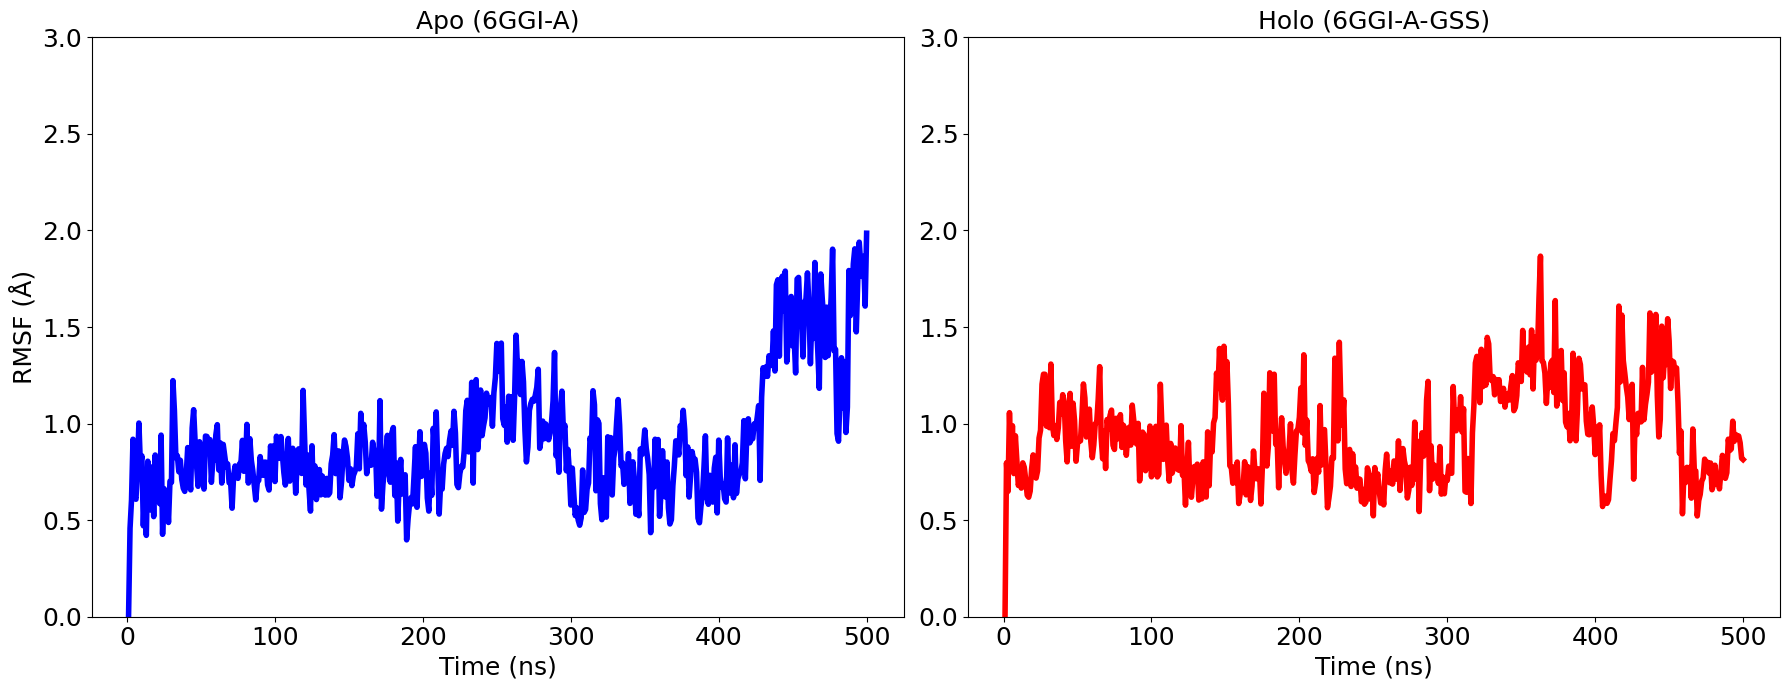

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# File paths for RMSF data
file_apo_rmsd = '6GGI-A_loop.rmsd'
file_holo_rmsd = '6GGI-A-GSA_loop.rmsd'

# Load the RMSF data from the files, assuming the first column is residue indices and the second column is RMSF values
data_apo = np.loadtxt(file_apo_rmsd, skiprows=1)  # Adjust skiprows if there's a header
data_holo = np.loadtxt(file_holo_rmsd, skiprows=1)

# Extract residue indices and RMSF values
time_apo = data_apo[:, 0]
rmsf_apo = data_apo[:, 1]

time_holo = data_holo[:, 0]
rmsf_holo = data_holo[:, 1]


# Font size customization
font_size_ticks = 18
font_size_labels = 18

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# Plot Apo RMSF on the left
axs[0].plot(time_apo, rmsf_apo, color='blue', linewidth=4)
axs[0].set_title('Apo (6GGI-A)', fontsize=font_size_labels)
axs[0].set_xlabel('Time (ns)', fontsize=font_size_labels)
axs[0].set_ylabel('RMSF (Å)', fontsize=font_size_labels)
axs[0].tick_params(axis='both', which='major', labelsize=font_size_ticks)
axs[0].set_ylim(0, 3)

# Plot Holo RMSF in the center
axs[1].plot(time_holo, rmsf_holo, color='red', linewidth=4)
axs[1].set_title('Holo (6GGI-A-GSS)', fontsize=font_size_labels)
axs[1].set_xlabel('Time (ns)', fontsize=font_size_labels)
#axs[1].set_ylabel('RMSF (Å)', fontsize=font_size_labels)
axs[1].tick_params(axis='both', which='major', labelsize=font_size_ticks)
axs[1].set_ylim(0, 3)



# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### PLOT GSA-RMSD and LIE

In [28]:
!ls -lrth

total 63M
-rw-r--r-- 1 root root 2.1M Dec  1 23:56 6GGI-A-GSS_clear.prmtop
-rw-r--r-- 1 root root 2.0M Dec  1 23:56 6GGI-A_clear.prmtop
-rw-r--r-- 1 root root 375K Dec  1 23:56 6GGI-A_equi.pdb
-rw-r--r-- 1 root root    1 Dec  1 23:56 README
-rw-r--r-- 1 root root 3.4M Dec  1 23:56 AMBERguide.pdf
drwxr-xr-x 2 root root 4.0K Dec  1 23:56 inputs-md
-rw-r--r-- 1 root root 131K Dec  1 23:56 md-steps.png
-rw-r--r-- 1 root root 380K Dec  1 23:56 6GGI-A-GSS_equi.pdb
-rw-r--r-- 1 root root  28M Dec  1 23:56 6GGI-A-GSS-md_500ns.dcd
-rw-r--r-- 1 root root  28M Dec  1 23:56 6GGI-A-md_500ns.dcd
-rw-r--r-- 1 root root  11K Dec  2 00:05 6GGI-A_backbone.rmsd
-rw-r--r-- 1 root root 6.5K Dec  2 00:05 6GGI-A_backbone.agr
-rw-r--r-- 1 root root  13K Dec  2 00:05 6GGI-A_loop.rmsd
-rw-r--r-- 1 root root  11K Dec  2 00:08 6GGI-A-GSS_backbone.rmsd
-rw-r--r-- 1 root root 6.5K Dec  2 00:08 6GGI-A-GSS_backbone.agr
-rw-r--r-- 1 root root  13K Dec  2 00:08 6GGI-A-GSA_loop.rmsd
-rw-r--r-- 1 root root  18K Dec  2 00

<ipython-input-29-0cc5cd999068>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True)


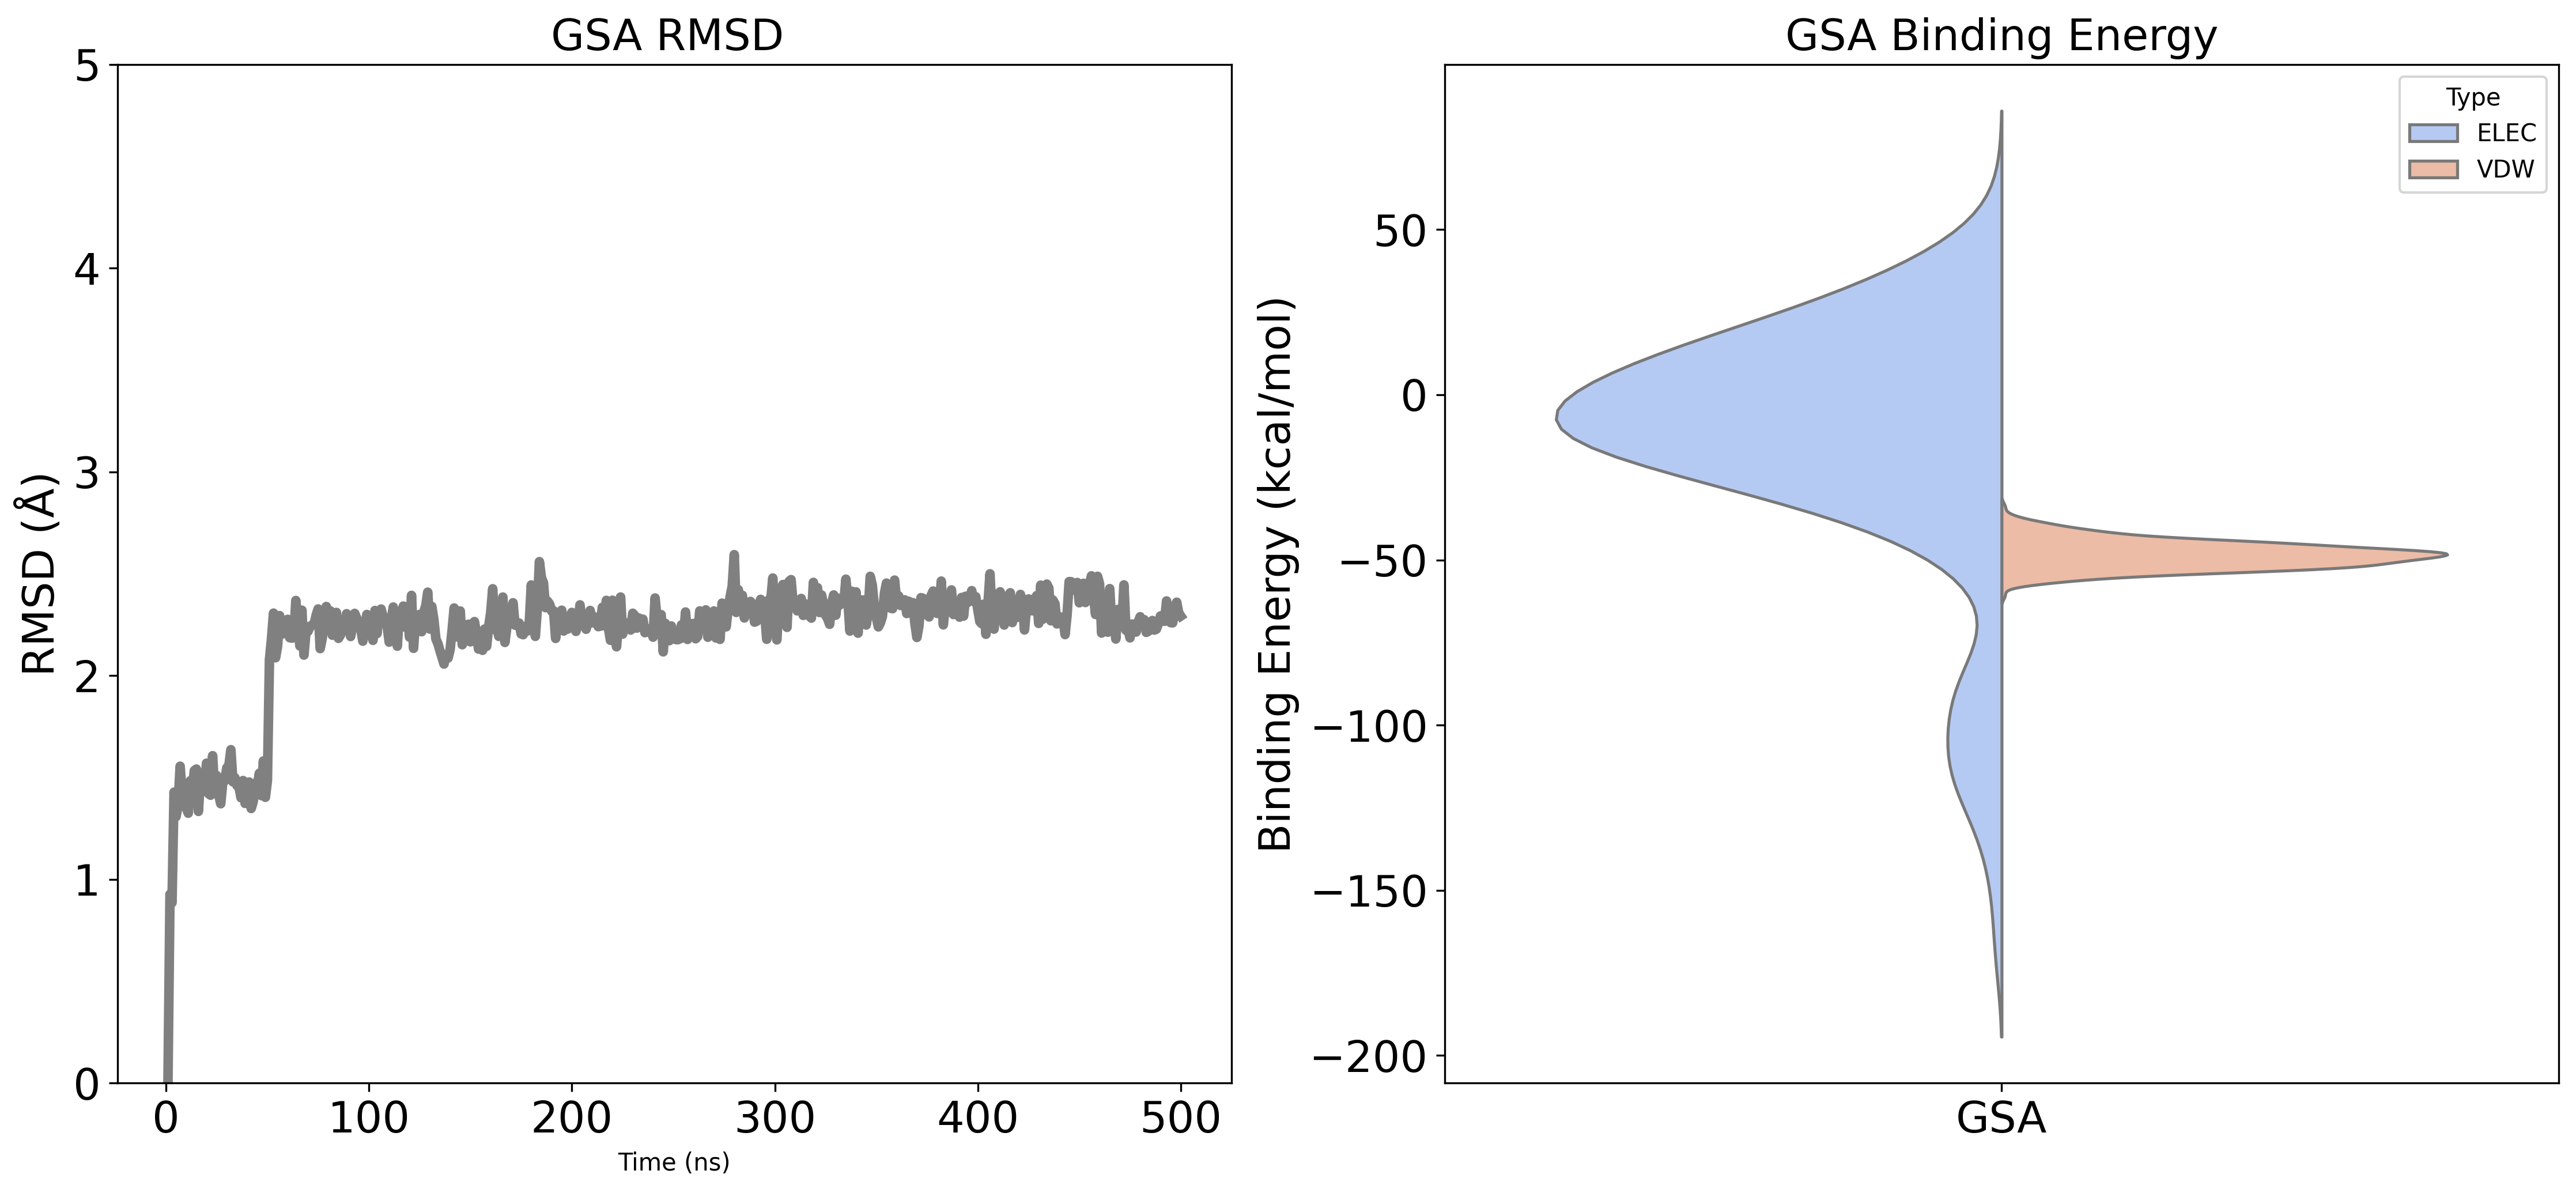

In [29]:
### First we modify lie-GSA.dat file to plot the violin accordingly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load the data
file_path = 'lie-GSA.dat'  # Replace with your file path
data = pd.read_csv(file_path, delim_whitespace=True)

# Transform data to long format
long_format_data = pd.melt(
    data,
    id_vars=['#Frame'],
    value_vars=['GSA[EELEC]', 'GSA[EVDW]'],
    var_name='Type',
    value_name='Value'
)

# Replace GSA[EELEC] and GSA[EVDW] with ELEC and VDW in the 'Type' column
long_format_data['Type'] = long_format_data['Type'].replace({'GSA[EELEC]': 'ELEC', 'GSA[EVDW]': 'VDW'})

# Modify the first column to contain only the string "GSA"
long_format_data['#Frame'] = 'GSA'

# Save the transformed data to a new file
output_file_path = 'lie.csv'
long_format_data.to_csv(output_file_path, index=False)

output_file_path

#### Ploting options
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
rmsd_file_path = 'GSA.rmsd'  # Replace with your RMSD file path
lie_file_path = 'lie.csv'    # Replace with your LIE file path

# Load GSA.rmsd data
data_gsa = np.loadtxt(rmsd_file_path, skiprows=1)  # Assuming data starts from second line

# Extract time (x-axis) and RMSD values (y-axis)
time_gsa = data_gsa[:, 0]  # Assuming time is in the first column
rmsd_gsa = data_gsa[:, 1]  # Assuming RMSD values are in the second column

# Load lie.csv data
lie_data = pd.read_csv(lie_file_path)
lie_data.columns = ['System', 'Type', 'Value']  # Ensure column names match

# Convert Value column to float
lie_data['Value'] = lie_data['Value'].astype(float)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7), dpi=300)

# Font size customization
font_size_ticks = 18
font_size_labels = 18

# Plot RMSD data on the left
axs[0].plot(time_gsa, rmsd_gsa, linewidth=4, label='RMSD', color='grey')
axs[0].set_xlabel('Time (ns)')
axs[0].set_ylabel('RMSD (Å)', fontsize=font_size_labels)
axs[0].set_title('GSA RMSD ', fontsize=font_size_labels)
axs[0].tick_params(axis='both', which='major', labelsize=font_size_ticks)
axs[0].set_ylim(0, 5)

# Plot violin plot on the right
sns.violinplot(
    data=lie_data, y='Value', x='System', hue='Type', split=True, inner=None, palette='coolwarm', ax=axs[1]
)
axs[1].set_ylabel('Binding Energy (kcal/mol)', fontsize=font_size_labels)
axs[1].set_xlabel('')
axs[1].set_title('GSA Binding Energy', fontsize=font_size_labels)
axs[1].tick_params(axis='both', which='major', labelsize=font_size_ticks)

# Adjust layout
plt.tight_layout()

# Save the plot
output_plot_path = 'rmsd_violin_plots.png'
plt.savefig(output_plot_path, bbox_inches='tight')
plt.show()

# 8. Discussion and conclusions

### Analysis and Questions for Discussion

1. **What information could you get from the visual inspection?**  
   - Describe any notable structural changes, interactions, or stability in the **APO** and **HOLO** systems.
   - Observe the positioning of **Mg²⁺** and its coordination environment.

2. **How is the interaction between Mg²⁺ and the phosphate groups?**  
   - Consider the geometry of the interaction.
   - Discuss the strength and stability of the coordination based on distances and angles.

3. **What kind of information do we get from RMSDs?**  
   - Root Mean Square Deviation (**RMSD**) provides insights into the overall structural stability of the protein and ligand during the simulation.
   - It indicates how much the structure deviates from the starting conformation over time.

4. **What kind of information do we get from RMSFs?**  
   - Root Mean Square Fluctuation (**RMSF**) reveals the flexibility of individual residues or regions in the protein.
   - It helps identify stable regions (low RMSF) and flexible or dynamic regions (high RMSF).

5. **The LIE values: Why is ELEC higher (in terms of energy) than VDW?**  
   - Discuss the contributions of **electrostatic interactions (ELEC)** and **van der Waals interactions (VDW)** to the binding free energy.
   - Typically, **ELEC** is higher due to stronger long-range electrostatic forces, whereas **VDW** involves weaker, short-range interactions.

6. **Are forcefields able to describe protein dynamics?**  
   - Take a look at this [blog post](https://corinwagen.github.io/public/blog/20241011_gems.html?s=03) for a discussion on the strengths and limitations of force fields in simulating protein dynamics.
